In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
df = pd.read_csv("../data/raw/train.csv")

In [3]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


***No column has missing data***


In [5]:
df.select_dtypes(include=["float64","int64"]).drop(columns="vendor_id").describe()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


## About the Columns

id - a unique identifier for each trip

vendor_id - a code indicating the provider associated with the trip record

pickup_datetime - date and time when the meter was engaged

dropoff_datetime - date and time when the meter was disengaged

passenger_count - the number of passengers in the vehicle (driver entered value)

pickup_longitude - the longitude where the meter was engaged

pickup_latitude - the latitude where the meter was engaged

dropoff_longitude - the longitude where the meter was disengaged

dropoff_latitude - the latitude where the meter was disengaged

store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip

trip_duration - duration of the trip in seconds


***converting pickup_datetime and dropoff_datetime to datetime object***

In [6]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])
df["dropoff_datetime"] = pd.to_datetime(df["dropoff_datetime"])

In [7]:
df.sample(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
895353,id1988157,2,2016-05-25 19:27:42,2016-05-25 19:30:38,2,-73.927689,40.811356,-73.919060,40.807438,N,176
1398798,id0190941,1,2016-02-24 23:27:57,2016-02-24 23:33:50,1,-73.968491,40.763248,-73.979462,40.766144,N,353
143520,id3690021,2,2016-04-02 21:41:00,2016-04-02 22:02:13,2,-73.993576,40.734203,-74.017220,40.705193,N,1273
1399409,id3402736,1,2016-02-19 16:18:07,2016-02-19 16:21:39,1,-73.965393,40.758984,-73.975349,40.752205,N,212
1138319,id3481594,1,2016-02-27 16:08:21,2016-02-27 16:23:46,2,-73.988785,40.742161,-73.971069,40.748573,N,925
575490,id0464222,2,2016-04-30 15:12:33,2016-04-30 15:15:48,1,-73.979530,40.784325,-73.976021,40.790588,N,195
423617,id0141557,2,2016-01-21 08:26:46,2016-01-21 08:34:57,1,-73.990410,40.756168,-73.978302,40.755932,N,491
430518,id1956930,1,2016-05-09 09:35:09,2016-05-09 09:43:30,1,-73.962746,40.758492,-73.961647,40.770958,N,501
752533,id3005457,1,2016-02-26 15:00:41,2016-02-26 15:15:15,1,-73.993202,40.767849,-73.991867,40.758297,N,874
1441437,id2789308,2,2016-05-12 21:00:51,2016-05-12 21:13:29,5,-73.980774,40.764938,-74.003578,40.741913,N,758


# Plot Distance function 

In [8]:
def plot_lines_on_map(df, lat1_col, lon1_col, lat2_col, lon2_col):

    # Calculate the midpoint for centering the map
    lat_mid = (df[lat1_col].mean() + df[lat2_col].mean()) / 2
    lon_mid = (df[lon1_col].mean() + df[lon2_col].mean()) / 2
    m = folium.Map(location=[lat_mid, lon_mid], zoom_start=4)

    for _, row in df.iterrows():
        # Extract coordinates for each pair of locations
        location1 = [row[lat1_col], row[lon1_col]]
        location2 = [row[lat2_col], row[lon2_col]]
        trip_id = row["id"]
        # Add markers for the two locations
        folium.Marker(location1, popup=f"Location 1 ({location1[0]}, {location1[1]}) <br> trip_id = {trip_id}").add_to(m)
        folium.Marker(location2, popup=f"Location 2 ({location2[0]}, {location2[1]}) <br> trip_id = {trip_id}").add_to(m)

        # Draw a line between the two locations
        folium.PolyLine([location1, location2], color="blue", weight=2.5, opacity=1).add_to(m)
    
    # Adjust zoom to fit all locations
    sw = [min(df[lat1_col].min(), df[lat2_col].min()), min(df[lon1_col].min(), df[lon2_col].min())]  # South-West corner
    ne = [max(df[lat1_col].max(), df[lat2_col].max()), max(df[lon1_col].max(), df[lon2_col].max())]  # North-East corner
    m.fit_bounds([sw, ne])

    # Display the map in the notebook
    return m


# Calculating Haversine Distance
***this formulae gives out distance between two points*** 

In [9]:
import math

def haversine(df):
    
    # Convert decimal degrees to radians
    lon1 = np.radians(df["pickup_longitude"].values)
    lat1 = np.radians(df["pickup_latitude"].values) 
    lon2 = np.radians(df["dropoff_longitude"].values) 
    lat2 = np.radians(df["dropoff_latitude"].values)

    # Haversine formula
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    r = 6371  # Radius of Earth in kilometers. Use 3956 for miles.
    return np.round((c * r),2)



In [10]:
df["distance"]=haversine(df)

In [11]:
df.sample(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
1293152,id2410030,2,2016-03-02 10:12:20,2016-03-02 10:18:32,5,-73.962013,40.770496,-73.967773,40.762669,N,372,1.00
994907,id3385955,1,2016-02-25 08:58:31,2016-02-25 09:23:04,1,-73.962570,40.773022,-73.980576,40.745319,N,1473,3.43
1079846,id0317688,2,2016-02-02 08:58:30,2016-02-02 09:14:53,1,-73.989937,40.719730,-74.006973,40.745708,N,983,3.23
1281875,id3105208,1,2016-02-04 22:10:04,2016-02-04 22:16:13,1,-73.964378,40.776085,-73.974709,40.779984,N,369,0.97
273778,id0907120,1,2016-05-28 01:03:27,2016-05-28 01:09:34,1,-73.977844,40.725941,-73.989441,40.734386,N,367,1.36
1439497,id0854234,2,2016-04-07 08:47:32,2016-04-07 08:50:00,4,-73.988838,40.764324,-73.992058,40.768990,N,148,0.59
128359,id1751601,2,2016-04-09 12:34:18,2016-04-09 12:41:49,4,-73.962479,40.770683,-73.951141,40.769291,N,451,0.97
568412,id0702791,1,2016-03-23 20:56:58,2016-03-23 21:12:25,1,-73.982422,40.768337,-73.946579,40.777515,N,927,3.19
505821,id2504574,2,2016-04-16 12:34:49,2016-04-16 12:45:21,1,-74.009010,40.739517,-73.985023,40.741913,N,632,2.04
1420921,id3001231,2,2016-02-26 22:21:21,2016-02-26 22:35:36,2,-73.996567,40.753078,-74.000053,40.728619,N,855,2.74


# Univariate Analysis

### DISTANCE 
It is in KM 

<Axes: xlabel='distance'>

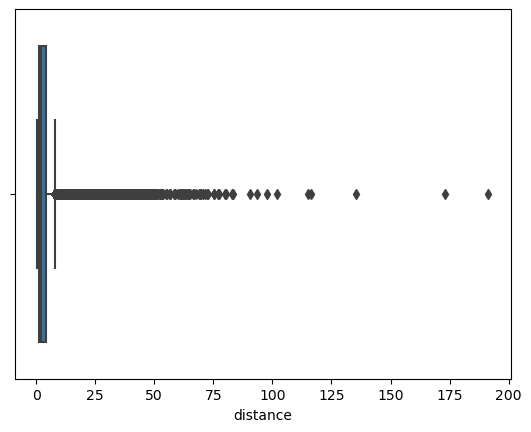

In [92]:
sns.boxplot(x=df["distance"])

In [93]:
q1 = df["distance"].quantile(0.25)
q3 = df["distance"].quantile(0.75)
median = df["distance"].quantile(0.5)
IQR=q3 - q1

upper_bound = 1.5*IQR + q3
lower_bound = q1 - 1.5*IQR

print(f"upperbound: {upper_bound} , lowerbound: {lower_bound} , IQR: {IQR} , q1: {q1} , median: {median} ,q3: {q3}")


upperbound: 8.125 , lowerbound: -2.7149999999999994 , IQR: 2.7099999999999995 , q1: 1.35 , median: 2.21 ,q3: 4.06


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='distance', ylabel='Count'>

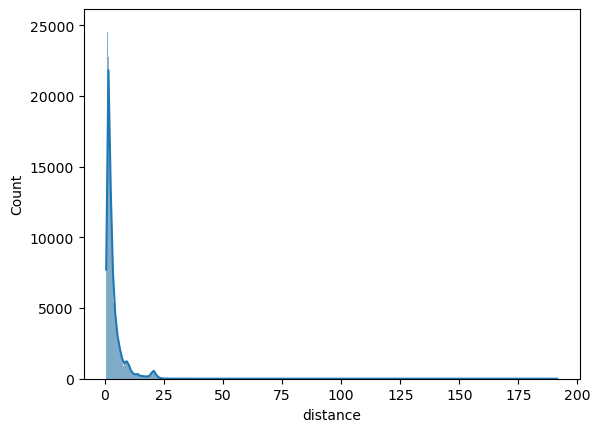

In [94]:
sns.histplot(x=df["distance"],kde=True)

In [15]:
df["distance"].describe()

count    1.458644e+06
mean     3.440864e+00
std      4.296543e+00
min      0.000000e+00
25%      1.230000e+00
50%      2.090000e+00
75%      3.880000e+00
max      1.240910e+03
Name: distance, dtype: float64

In [16]:
#removing the datapoints whose distance is 0
indexes = df[df["distance"] == 0].index
df=df.drop(index=indexes)

In [17]:
# creating average speed column help us to find invalid data
df["trip_duration"]= df["trip_duration"] / 3600 

In [18]:
df["speed"] = df["distance"]/df["trip_duration"]

In [19]:
 df[df["speed"] >= 531.082]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,speed
1107,id0729156,2,2016-06-23 13:36:48,2016-06-23 13:36:50,3,-73.827660,40.716175,-73.822113,40.711452,N,0.000556,0.70,1260.000000
133641,id2362780,2,2016-06-30 05:01:03,2016-06-30 05:01:11,1,-74.164268,40.711639,-74.179352,40.711342,N,0.002222,1.27,571.500000
184925,id2306955,1,2016-05-07 18:58:53,2016-05-07 19:12:05,1,-72.809669,51.881084,-73.987228,40.750599,N,0.220000,1240.91,5640.500000
259403,id2507444,2,2016-01-27 09:03:12,2016-01-27 09:03:22,1,-73.807419,40.657215,-73.783249,40.643806,N,0.002778,2.53,910.800000
275644,id0978162,1,2016-02-24 16:20:59,2016-02-24 16:35:34,4,-75.354332,34.712234,-73.834923,32.181141,N,0.243056,314.76,1295.012571
283102,id2778014,2,2016-01-17 16:43:09,2016-01-17 16:50:16,1,-73.997086,40.728924,-72.671150,40.614220,N,0.118611,112.55,948.899297
334058,id0578768,2,2016-01-21 00:22:21,2016-01-21 00:22:36,1,-73.995796,40.726521,-73.956528,40.733551,N,0.004167,3.40,816.000000
377068,id0116374,1,2016-04-02 20:33:19,2016-04-02 20:38:01,1,-74.007095,40.717113,-76.963242,38.946033,N,0.078333,320.13,4086.765957
397526,id0982904,1,2016-04-28 13:32:14,2016-04-28 14:14:09,2,-73.870682,40.773598,-79.817978,38.963852,N,0.698611,545.85,781.335984
421446,id3484419,2,2016-06-27 15:44:13,2016-06-27 15:44:16,6,-73.951782,40.797951,-73.956528,40.799911,N,0.000833,0.46,552.000000


In [20]:
# highest speed car has speed of 531.082 km/hr hence record have speed greater than this is clearly invalid data
invalid_indexes = df[df["speed"] >= 531.082].index
df = df.drop(index=invalid_indexes)

In [21]:
# average walking speed is 5km/hr hence less than this speed is potential invalid data

invalid_indexes = df[df["speed"] < 4].index
df = df.drop(index=invalid_indexes)

In [22]:
# 500m to travel with cab is very small distance hence potential invalid data
invalid_indexes = df[df["distance"] <= 0.500].index
df = df.drop(index=invalid_indexes)

### Speed
(since Speed is driven from trip_duration it cannot be used in prediction . using just for finding invalid data)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='speed', ylabel='Count'>

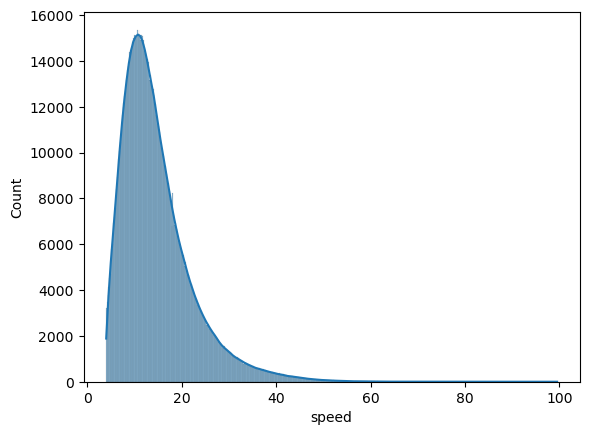

In [95]:
sns.histplot(x=df["speed"],kde=True)

<Axes: xlabel='speed'>

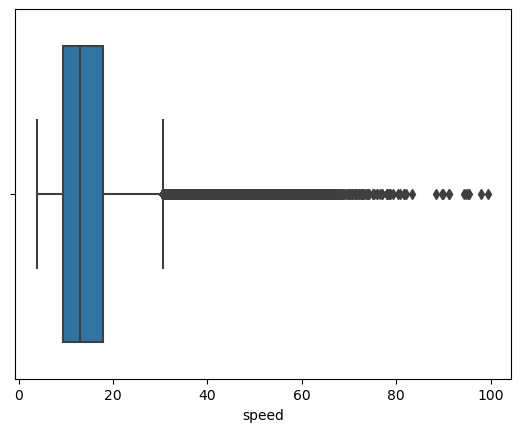

In [96]:
sns.boxplot(x=df["speed"])

In [25]:
q1 = df["speed"].quantile(0.25)
q3 = df["speed"].quantile(0.75)
median = df["speed"].quantile(0.5)
IQR=q3 - q1

upper_bound = 1.5*IQR + q3
lower_bound = q1 - 1.5*IQR

print(f"upperbound: {upper_bound} , lowerbound: {lower_bound} , IQR: {IQR} , q1: {q1} , median: {median} ,q3: {q3}")


upperbound: 31.02846715328467 , lowerbound: -3.363746958637469 , IQR: 8.598053527980534 , q1: 9.533333333333333 , median: 13.102473498233214 ,q3: 18.131386861313867


In [26]:
df["speed"].describe()

count    1.387427e+06
mean     1.481755e+01
std      7.682703e+00
min      4.000000e+00
25%      9.533333e+00
50%      1.310247e+01
75%      1.813139e+01
max      5.204772e+02
Name: speed, dtype: float64

In [27]:
# speed limit of a taxi in NYC city is 32.186 km/h(inter city) and 89 km/h(highway outside cities) 
# 100km/hr is not possible inside city hence it can be potential invalid data

invalid_indexes = df[df["speed"]>=100].index
df = df.drop(index=invalid_indexes)

In [28]:
df[df["speed"]>=100]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,speed


### Trip_duration

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='trip_duration', ylabel='Count'>

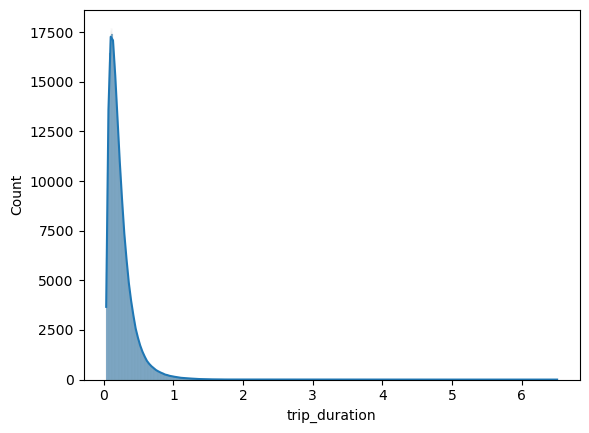

In [97]:
sns.histplot(x=df["trip_duration"],kde=True)

<Axes: xlabel='trip_duration'>

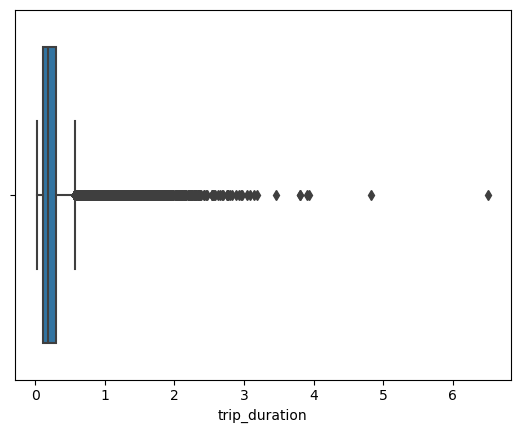

In [98]:
sns.boxplot(x=df["trip_duration"])

In [31]:
q1 = df["trip_duration"].quantile(0.25)
q3 = df["trip_duration"].quantile(0.75)
median = df["trip_duration"].quantile(0.5)
IQR=q3 - q1

upper_bound = 1.5*IQR + q3
lower_bound = q1 - 1.5*IQR

print(f"upperbound: {upper_bound} , lowerbound: {lower_bound} , IQR: {IQR} , q1: {q1} , median: {median} ,q3: {q3}")


upperbound: 0.5783333333333334 , lowerbound: -0.16388888888888886 , IQR: 0.18555555555555553 , q1: 0.11444444444444445 , median: 0.18666666666666668 ,q3: 0.3


In [32]:
df["trip_duration"].describe()

count    1.387362e+06
mean     2.359441e-01
std      1.816100e-01
min      5.833333e-03
25%      1.144444e-01
50%      1.866667e-01
75%      3.000000e-01
max      6.511111e+00
Name: trip_duration, dtype: float64

In [33]:
# removing trip_duration which are less then 2 minutes because can be potential invalid_data
invalid_indexes = df[df["trip_duration"] <= (2/60)].index
df = df.drop(index=invalid_indexes)

In [34]:
df[df["trip_duration"] > 4 ]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,speed
114376,id1311087,1,2016-02-29 12:16:29,2016-02-29 18:47:09,3,-75.455917,39.803932,-73.796021,40.707726,N,6.511111,173.03,26.574573
1416336,id3795134,1,2016-03-21 20:54:00,2016-03-22 01:43:23,3,-75.238327,39.923027,-73.922577,40.610130,N,4.823056,135.28,28.048609


In [35]:
plot_lines_on_map(df[df["trip_duration"] > 4 ],"pickup_latitude","pickup_longitude","dropoff_latitude","dropoff_longitude")

In [36]:
# above graph shows trip duration more than 4 hrs is valid

In [37]:
df["trip_duration"].count()/1458644  # till now we lost 6 % of our data

0.9430539597050411

### Passenger_count

In [38]:
df["passenger_count"].unique()

array([1, 6, 4, 2, 3, 5, 0])

<Axes: xlabel='passenger_count'>

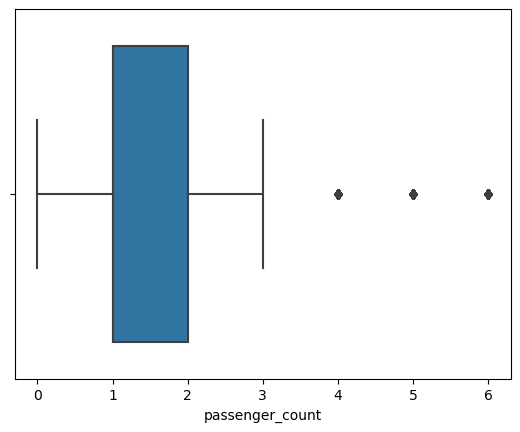

In [39]:
sns.boxplot(x=df["passenger_count"])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='passenger_count', ylabel='Density'>

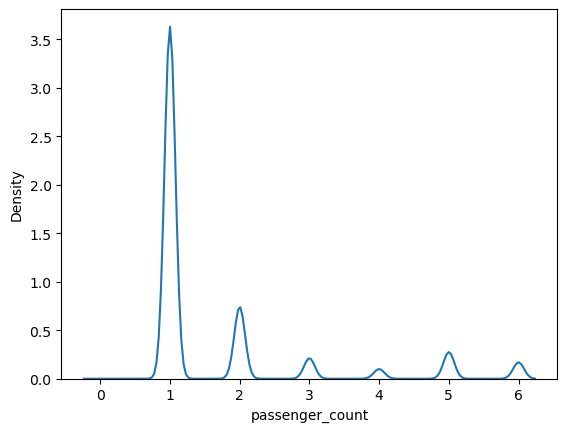

In [40]:
sns.kdeplot(df["passenger_count"])

In [41]:
q1 = df["passenger_count"].quantile(0.25)
q3 = df["passenger_count"].quantile(0.75)
median = df["passenger_count"].quantile(0.5)
IQR=q3 - q1

upper_bound = 1.5*IQR + q3
lower_bound = q1 - 1.5*IQR

print(f"upperbound: {upper_bound} , lowerbound: {lower_bound} , IQR: {IQR} , q1: {q1} , median: {median} ,q3: {q3}")


upperbound: 3.5 , lowerbound: -0.5 , IQR: 1.0 , q1: 1.0 , median: 1.0 ,q3: 2.0


In [42]:
(df["passenger_count"].value_counts()/df["passenger_count"].count())*100 # precentage contribution

passenger_count
1    70.793556
2    14.475857
5     5.362247
3     4.118772
6     3.300644
4     1.948051
0     0.000872
Name: count, dtype: float64

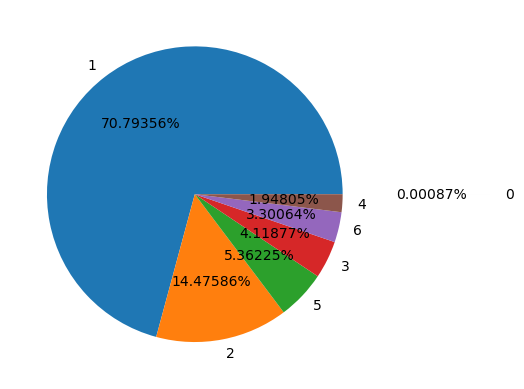

In [43]:
plt.pie(df["passenger_count"].value_counts(),autopct="%1.5f%%",labels=df["passenger_count"].value_counts().index,explode=[0,0,0,0,0,0,1])
plt.show()

***ploting above rides to see validaty*** 

In [44]:
plot_lines_on_map(df[df["passenger_count"] == 0],"pickup_latitude","pickup_longitude","dropoff_latitude","dropoff_longitude")

In [45]:
df[df["passenger_count"] == 2]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,speed
12,id1187965,2,2016-02-19 09:52:46,2016-02-19 10:11:20,2,-73.962982,40.756680,-73.984406,40.760719,N,0.309444,1.86,6.010772
32,id3075902,2,2016-05-10 19:27:38,2016-05-10 19:44:40,2,-74.005501,40.706589,-73.985817,40.744202,N,0.283889,4.50,15.851272
38,id3323083,1,2016-05-27 14:26:12,2016-05-27 14:46:01,2,-73.978127,40.758343,-73.992249,40.730541,N,0.330278,3.31,10.021867
40,id0578558,1,2016-04-21 21:28:27,2016-04-21 21:52:37,2,-73.988548,40.745979,-73.970886,40.793385,N,0.402778,5.48,13.605517
41,id2573056,2,2016-04-14 13:27:52,2016-04-14 13:46:14,2,-73.974724,40.751137,-73.954445,40.764118,N,0.306111,2.24,7.317604
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458605,id2836103,1,2016-01-11 15:34:38,2016-01-11 15:53:20,2,-74.011909,40.710911,-73.985527,40.739952,N,0.311667,3.92,12.577540
1458626,id0155863,2,2016-01-17 17:21:11,2016-01-17 17:25:15,2,-73.954071,40.767021,-73.950340,40.778233,N,0.067778,1.29,19.032787
1458628,id0986544,2,2016-05-30 03:08:19,2016-05-30 03:14:10,2,-73.988632,40.721378,-73.975548,40.728519,N,0.097500,1.36,13.948718
1458632,id0469946,2,2016-03-06 11:04:48,2016-03-06 11:17:45,2,-74.015572,40.710892,-73.996620,40.743633,N,0.215833,3.98,18.440154


In [46]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,0.126389,1.50,11.868132
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,0.184167,1.81,9.828054
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,0.590000,6.39,10.830508
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,0.119167,1.49,12.503497
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,0.120833,1.19,9.848276


## Extracting information form datetime column

In [47]:
df["month"] = df["pickup_datetime"].dt.month
df["hours"] = df["pickup_datetime"].dt.hour
df['day'] = df['pickup_datetime'].dt.day_name()

In [48]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,speed,month,hours,day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,0.126389,1.50,11.868132,3,17,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,0.184167,1.81,9.828054,6,0,Sunday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,0.590000,6.39,10.830508,1,11,Tuesday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,0.119167,1.49,12.503497,4,19,Wednesday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,0.120833,1.19,9.848276,3,13,Saturday


## Month

In [49]:
df["month"].value_counts()

month
3    242498
4    237378
5    233829
2    225008
6    220035
1    216832
Name: count, dtype: int64

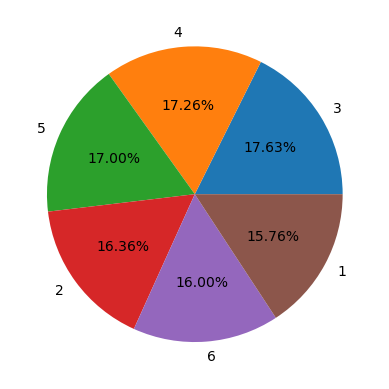

In [50]:
plt.pie(df["month"].value_counts(),labels=df["month"].value_counts().index,autopct="%1.2f%%")
plt.show()

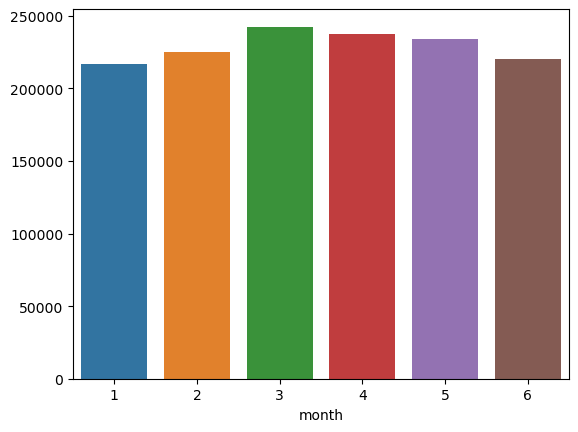

In [51]:
sns.barplot(y=df["month"].value_counts().values , x=df["month"].value_counts().index)
plt.show()

From above charts we can conclude

* all the months has similar number of rides

## Hour

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


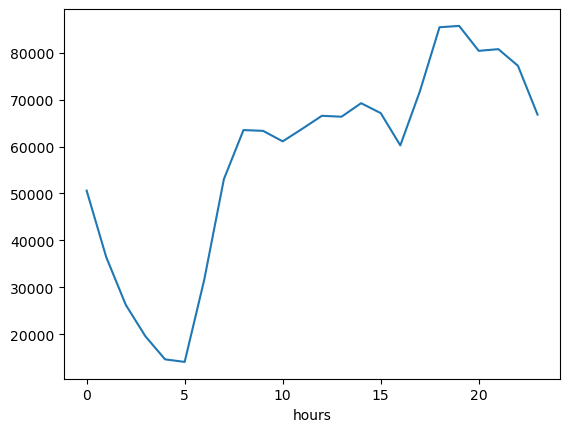

In [52]:
sns.lineplot(x=df["hours"].value_counts().index,y=df["hours"].value_counts().values)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


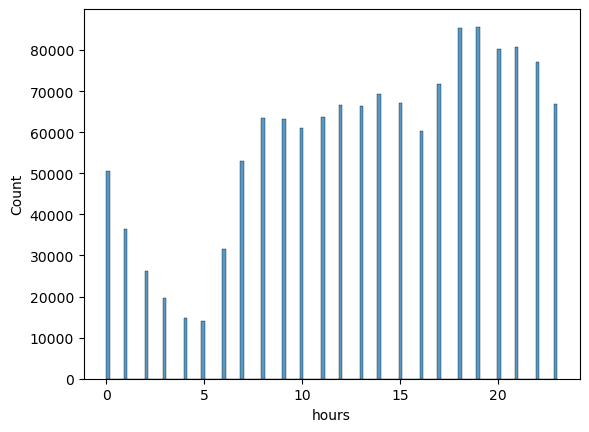

In [53]:
sns.histplot(df["hours"])
plt.show()

from above graphs we can conclude

* number of rides are more in night
* number of rides are less in early morning
* number of rides are in between in afternoon

## Day

In [54]:
df["day"].value_counts()

day
Friday       210766
Saturday     208738
Thursday     205472
Wednesday    197248
Tuesday      190854
Sunday       185109
Monday       177393
Name: count, dtype: int64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


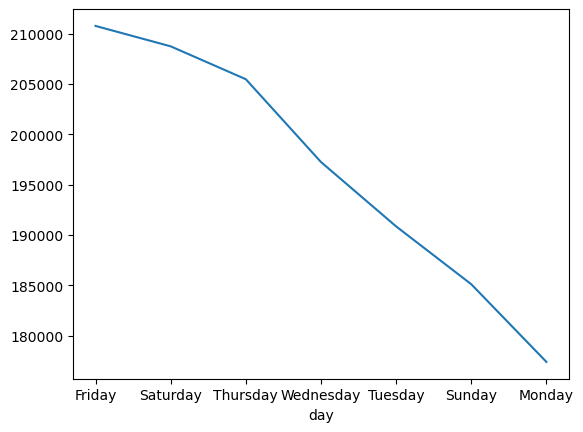

In [55]:
sns.lineplot(x=df["day"].value_counts().index,y=df["day"].value_counts().values)
plt.show()

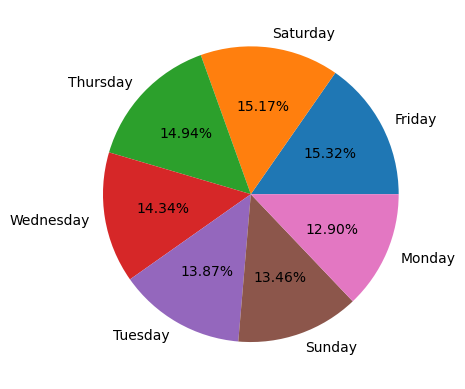

In [56]:
plt.pie(df["day"].value_counts(),labels=df["day"].value_counts().index,autopct="%1.2f%%")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


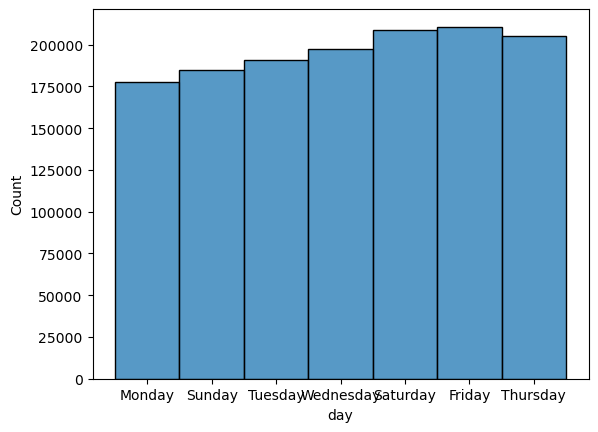

In [57]:
sns.histplot(df["day"])
plt.show()

from the above graphs we can conclude that 
* number of rides decrease when we shift from friday to monday

## Multivariate Analysis

In [58]:
cols = ["vendor_id",'passenger_count', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude','trip_duration', 'distance', 'month', 'hours']
df[cols].corr()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,month,hours
vendor_id,1.000000,0.286762,0.017553,0.002101,0.005077,0.004655,0.006871,0.009346,-0.006284,0.008937
passenger_count,0.286762,1.000000,0.005082,-0.005309,0.000410,-0.002610,0.013307,0.010561,-0.002256,0.008843
pickup_longitude,0.017553,0.005082,1.000000,-0.151561,0.232197,0.046219,0.383802,0.528112,0.007592,0.019307
pickup_latitude,0.002101,-0.005309,-0.151561,1.000000,0.054196,0.399423,-0.247519,-0.326443,-0.002929,0.012399
dropoff_longitude,0.005077,0.000410,0.232197,0.054196,1.000000,0.137934,0.238809,0.373762,0.008888,-0.046321
dropoff_latitude,0.004655,-0.002610,0.046219,0.399423,0.137934,1.000000,-0.186750,-0.158844,-0.001402,0.015319
trip_duration,0.006871,0.013307,0.383802,-0.247519,0.238809,-0.186750,1.000000,0.784362,0.059764,0.027146
distance,0.009346,0.010561,0.528112,-0.326443,0.373762,-0.158844,0.784362,1.000000,0.018838,-0.021789
month,-0.006284,-0.002256,0.007592,-0.002929,0.008888,-0.001402,0.059764,0.018838,1.000000,-0.004175
hours,0.008937,0.008843,0.019307,0.012399,-0.046321,0.015319,0.027146,-0.021789,-0.004175,1.000000


<Axes: >

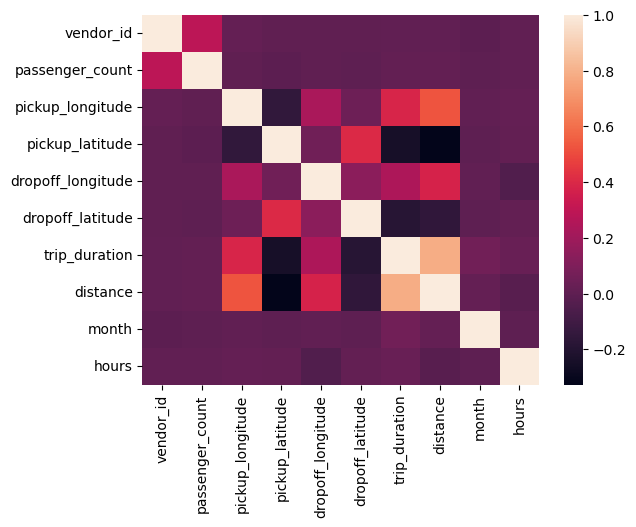

In [59]:
sns.heatmap(df[cols].corr())

In [60]:
df[cols].corr()["trip_duration"]

vendor_id            0.006871
passenger_count      0.013307
pickup_longitude     0.383802
pickup_latitude     -0.247519
dropoff_longitude    0.238809
dropoff_latitude    -0.186750
trip_duration        1.000000
distance             0.784362
month                0.059764
hours                0.027146
Name: trip_duration, dtype: float64

### conclusion from above data
* ***distance is highly corelated with trip_duration***
* ***pickup nad drop longitude are positively corelated with trip_duration***
* ***pickup nad drop latitude are negatively corelated with trip_duration***

In [61]:
from feature_engine.encoding import CountFrequencyEncoder

## applying count encoding on day column
encoder = CountFrequencyEncoder(
encoding_method='count',
variables=['day'],
)
encoder.fit(df)
df_temp = encoder.transform(df)


In [62]:
cols = ["vendor_id",'passenger_count', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude','trip_duration', 'distance', 'month', 'hours',"day"]
df_temp[cols].corr()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,month,hours,day
vendor_id,1.000000,0.286762,0.017553,0.002101,0.005077,0.004655,0.006871,0.009346,-0.006284,0.008937,-0.001463
passenger_count,0.286762,1.000000,0.005082,-0.005309,0.000410,-0.002610,0.013307,0.010561,-0.002256,0.008843,0.005899
pickup_longitude,0.017553,0.005082,1.000000,-0.151561,0.232197,0.046219,0.383802,0.528112,0.007592,0.019307,-0.033926
pickup_latitude,0.002101,-0.005309,-0.151561,1.000000,0.054196,0.399423,-0.247519,-0.326443,-0.002929,0.012399,-0.001081
dropoff_longitude,0.005077,0.000410,0.232197,0.054196,1.000000,0.137934,0.238809,0.373762,0.008888,-0.046321,-0.011613
dropoff_latitude,0.004655,-0.002610,0.046219,0.399423,0.137934,1.000000,-0.186750,-0.158844,-0.001402,0.015319,-0.007456
trip_duration,0.006871,0.013307,0.383802,-0.247519,0.238809,-0.186750,1.000000,0.784362,0.059764,0.027146,0.027709
distance,0.009346,0.010561,0.528112,-0.326443,0.373762,-0.158844,0.784362,1.000000,0.018838,-0.021789,-0.022060
month,-0.006284,-0.002256,0.007592,-0.002929,0.008888,-0.001402,0.059764,0.018838,1.000000,-0.004175,-0.011396
hours,0.008937,0.008843,0.019307,0.012399,-0.046321,0.015319,0.027146,-0.021789,-0.004175,1.000000,0.009360


<Axes: >

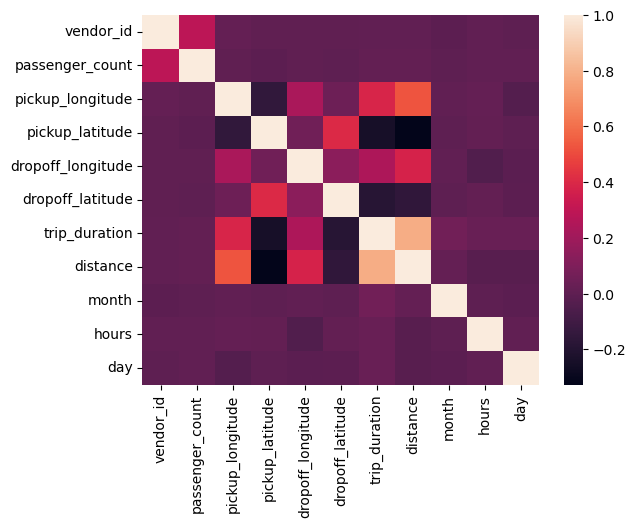

In [63]:
sns.heatmap(df_temp[cols].corr())

In [64]:
df_temp[cols].corr()["trip_duration"]

vendor_id            0.006871
passenger_count      0.013307
pickup_longitude     0.383802
pickup_latitude     -0.247519
dropoff_longitude    0.238809
dropoff_latitude    -0.186750
trip_duration        1.000000
distance             0.784362
month                0.059764
hours                0.027146
day                  0.027709
Name: trip_duration, dtype: float64

***count and frequency encoding of "days" not able to establish realtion with trip_duration*** 

## Discretisation
(for hours)

- **Midnight**: 00:00 - 02:00
- **Early Morning**: 02:00 - 06:00
- **Morning**: 06:00 - 09:00
- **Late Morning**: 09:00 - 12:00
- **Afternoon**: 12:00 - 15:00
- **Late Afternoon**: 15:00 - 18:00
- **Evening**: 18:00 - 21:00
- **Night**: 21:00 - 00:00

In [65]:
bins = [0,2,6,9,12,15,18,21,24]
labels = ["Midnight","Early Morning","Morning","Late Morning","Afternoon","Late Afternoon","Evening","Night"]
df_temp["hours"] = pd.cut(df["hours"].values,bins,labels=labels,right=False)

In [66]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(categories=[labels])
df_temp["hours"]=enc.fit_transform(df_temp[["hours"]])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


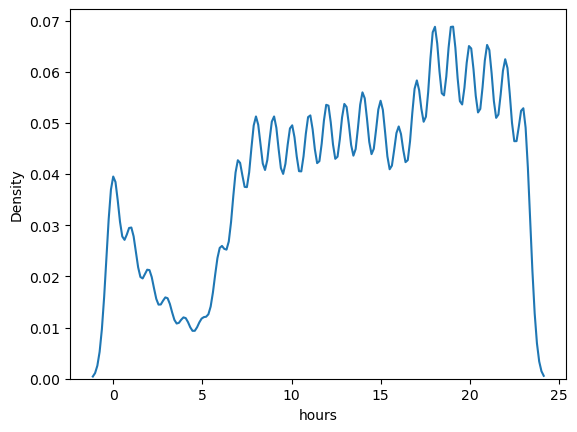

In [67]:
sns.kdeplot(df,x="hours")
plt.show()

In [68]:
df["hours"] = df_temp["hours"] 

In [69]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'distance', 'speed', 'month', 'hours', 'day'],
      dtype='object')

In [70]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,speed,month,hours,day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,0.126389,1.50,11.868132,3,5.0,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,0.184167,1.81,9.828054,6,0.0,Sunday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,0.590000,6.39,10.830508,1,3.0,Tuesday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,0.119167,1.49,12.503497,4,6.0,Wednesday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,0.120833,1.19,9.848276,3,4.0,Saturday


In [71]:
test_df = df.drop(columns=["speed","pickup_datetime","dropoff_datetime"]).set_index(["id"])

In [72]:
test_df

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,month,hours,day
id,,,,,,,,,,,,
id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,N,0.126389,1.50,3,5.0,Monday
id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,N,0.184167,1.81,6,0.0,Sunday
id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,N,0.590000,6.39,1,3.0,Tuesday
id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,N,0.119167,1.49,4,6.0,Wednesday
id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,N,0.120833,1.19,3,4.0,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...
id2376096,2,4,-73.982201,40.745522,-73.994911,40.740170,N,0.216111,1.23,4,4.0,Friday
id1049543,1,1,-74.000946,40.747379,-73.970184,40.796547,N,0.181944,6.05,1,2.0,Sunday
id2304944,2,1,-73.959129,40.768799,-74.004433,40.707371,N,0.212222,7.82,4,2.0,Friday


In [73]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
encoded_df = pd.DataFrame(enc.fit_transform(df[["day"]]),columns=enc.categories_[0])

In [74]:
test_df = pd.concat([df.reset_index().drop(columns="day"),encoded_df],axis=1).drop(columns="index").set_index("id")

In [75]:
# test_df = test_df.drop(columns=["pickup_datetime","dropoff_datetime"])
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
test_df["store_and_fwd_flag"]=enc.fit_transform(test_df[["store_and_fwd_flag"]])


In [91]:
# test_df = test_df.drop(columns=["pickup_datetime","dropoff_datetime"])
test_df = test_df.sample(20000)

## Baseline Test

In [87]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

X = test_df.drop(columns="trip_duration") * 3600
y = test_df["trip_duration"]

kfold = KFold(n_splits=5, random_state=42, shuffle=True)

regr = RandomForestRegressor(random_state=0)



scores = cross_validate(regr, X, y, cv=kfold,n_jobs=-1,scoring=["neg_mean_absolute_error","r2"])




In [89]:
print("neg_mae",scores["test_neg_mean_absolute_error"].mean())
print("r2_score",scores["test_r2"].mean())

neg_mae -0.0024729006944444443
r2_score 0.9919303448034409


***baseline model showing good result***
- **neg_mae -0.0024729006944444443** (model is doing error of 0.00247 seconds)
- **r2_score 0.9919303448034409**